In [1]:
import pandas as pd
import numpy as np
import random
import re
import nltk
import regex

In [2]:
data = pd.read_csv('Womens Clothing E-Commerce Reviews.csv')
data = data.dropna()

In [3]:
data.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
5,5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses
6,6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits


## Classifier with 3 Classes, Positive/Negative/Neutral

In [4]:
data["is_bad_review"] = data["Rating"].apply(lambda x: -1 if x < 3 else 0 if x == 3 else 1)
data.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,is_bad_review
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,0
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,1
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,1
5,5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses,-1
6,6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits,1


In [5]:
reviews_df = data[["Review Text", "is_bad_review"]]
reviews_df = reviews_df.reset_index()

In [6]:
reviews_df.head()

,index,Review Text,is_bad_review
0,2,I had such high hopes for this dress and reall...,0
1,3,"I love, love, love this jumpsuit. it's fun, fl...",1
2,4,This shirt is very flattering to all due to th...,1
3,5,"I love tracy reese dresses, but this one is no...",-1
4,6,I aded this in my basket at hte last mintue to...,1


In [7]:
# Cleaning the Text

In [8]:
# return the wordnet object value corresponding to the POS tag
from nltk.corpus import wordnet

def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
    
import string
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer

def clean_text(text):
    # lower text
    text = text.lower()
    # tokenize text and remove puncutation
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    # remove words that contain numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    # remove stop words
    stop = stopwords.words('english')
    text = [x for x in text if x not in stop]
    # remove empty tokens
    text = [t for t in text if len(t) > 0]
    # pos tag text
    pos_tags = pos_tag(text)
    # lemmatize text
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    # remove words with only one letter
    text = [t for t in text if len(t) > 1]
    # join all
    text = " ".join(text)
    return(text)

In [9]:
# clean text data
reviews_df["clean_review"] = reviews_df["Review Text"].apply(lambda x: clean_text(x))

In [10]:
reviews_df.head()

,index,Review Text,is_bad_review,clean_review
0,2,I had such high hopes for this dress and reall...,0,high hope dress really wanted work initially o...
1,3,"I love, love, love this jumpsuit. it's fun, fl...",1,love love love jumpsuit fun flirty fabulous ev...
2,4,This shirt is very flattering to all due to th...,1,shirt flatter due adjustable front tie perfect...
3,5,"I love tracy reese dresses, but this one is no...",-1,love tracy reese dress one petite foot tall us...
4,6,I aded this in my basket at hte last mintue to...,1,aded basket hte last mintue see would look lik...


In [11]:
# add sentiment anaylsis columns
# from nltk.sentiment.vader import SentimentIntensityAnalyzer

# sid = SentimentIntensityAnalyzer()
# reviews_df["sentiments"] = reviews_df["Review Text"].apply(lambda x: sid.polarity_scores(x))
# reviews_df.head()


In [12]:
# reviews_df = pd.concat([reviews_df.drop(['sentiments'], axis=1), reviews_df['sentiments'].apply(pd.Series)], axis=1)

In [13]:
reviews_df.head()

,index,Review Text,is_bad_review,clean_review
0,2,I had such high hopes for this dress and reall...,0,high hope dress really wanted work initially o...
1,3,"I love, love, love this jumpsuit. it's fun, fl...",1,love love love jumpsuit fun flirty fabulous ev...
2,4,This shirt is very flattering to all due to th...,1,shirt flatter due adjustable front tie perfect...
3,5,"I love tracy reese dresses, but this one is no...",-1,love tracy reese dress one petite foot tall us...
4,6,I aded this in my basket at hte last mintue to...,1,aded basket hte last mintue see would look lik...


In [14]:
# add number of characters column
reviews_df["num_char"] = reviews_df["Review Text"].apply(lambda x: len(x))

# add number of words column
reviews_df["num_words"] = reviews_df["Review Text"].apply(lambda x: len(x.split(" ")))

In [15]:
# create doc2vec vector columns
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(reviews_df["clean_review"].apply(lambda x: x.split(" ")))]
documents
# train a Doc2Vec model with our text data
model = Doc2Vec(documents, vector_size=5, window=2, min_count=1, workers=4)

# # transform each document into a vector data
doc2vec_df = reviews_df["clean_review"].apply(lambda x: model.infer_vector(x.split(" "))).apply(pd.Series)
doc2vec_df.columns = ["doc2vec_vector_" + str(x) for x in doc2vec_df.columns]
doc2vec_df.head()

,doc2vec_vector_0,doc2vec_vector_1,doc2vec_vector_2,doc2vec_vector_3,doc2vec_vector_4
0,0.087740,0.090685,0.269328,-0.387632,0.316025
1,0.087790,0.063461,0.078039,-0.015430,-0.322188
2,0.076050,0.006195,0.275669,-0.116098,-0.236567
3,-0.011343,0.330914,-0.096224,-0.219925,0.062462
4,0.611502,0.760502,-0.048598,-0.893866,0.310163


In [16]:
reviews_df = pd.concat([reviews_df, doc2vec_df], axis=1)
reviews_df.head()

,index,Review Text,is_bad_review,clean_review,num_char,num_words,doc2vec_vector_0,doc2vec_vector_1,doc2vec_vector_2,doc2vec_vector_3,doc2vec_vector_4
0,2,I had such high hopes for this dress and reall...,0,high hope dress really wanted work initially o...,500,98,0.087740,0.090685,0.269328,-0.387632,0.316025
1,3,"I love, love, love this jumpsuit. it's fun, fl...",1,love love love jumpsuit fun flirty fabulous ev...,124,22,0.087790,0.063461,0.078039,-0.015430,-0.322188
2,4,This shirt is very flattering to all due to th...,1,shirt flatter due adjustable front tie perfect...,192,36,0.076050,0.006195,0.275669,-0.116098,-0.236567
3,5,"I love tracy reese dresses, but this one is no...",-1,love tracy reese dress one petite foot tall us...,488,98,-0.011343,0.330914,-0.096224,-0.219925,0.062462
4,6,I aded this in my basket at hte last mintue to...,1,aded basket hte last mintue see would look lik...,496,101,0.611502,0.760502,-0.048598,-0.893866,0.310163


In [17]:
# add tf-idfs columns
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(min_df = 250, ngram_range=(2,2))
tfidf_result = tfidf.fit_transform(reviews_df["clean_review"]).toarray()
tfidf_df = pd.DataFrame(tfidf_result, columns = tfidf.get_feature_names())
tfidf_df.columns = ["word_" + str(x) for x in tfidf_df.columns]
tfidf_df.index = reviews_df.index
tfidf_df.head(15)

,word_absolutely love,word_can wait,word_dress fit,word_even though,word_fabric soft,word_feel like,word_fit great,word_fit like,word_fit perfect,word_fit perfectly,...,word_soft comfortable,word_super cute,word_super soft,word_think would,word_true size,word_usual size,word_usually wear,word_want love,word_wear size,word_well make
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.00000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.66659,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0


In [18]:
tfidf_df.describe()

,word_absolutely love,word_can wait,word_dress fit,word_even though,word_fabric soft,word_feel like,word_fit great,word_fit like,word_fit perfect,word_fit perfectly,...,word_soft comfortable,word_super cute,word_super soft,word_think would,word_true size,word_usual size,word_usually wear,word_want love,word_wear size,word_well make
count,19662.000000,19662.000000,19662.000000,19662.000000,19662.000000,19662.000000,19662.000000,19662.000000,19662.000000,19662.000000,...,19662.000000,19662.000000,19662.000000,19662.000000,19662.000000,19662.000000,19662.000000,19662.000000,19662.000000,19662.000000
mean,0.011107,0.011900,0.011733,0.010890,0.012037,0.016686,0.019701,0.016037,0.015010,0.032338,...,0.011273,0.011862,0.011391,0.010793,0.038516,0.016493,0.021398,0.010937,0.011155,0.018073
std,0.094297,0.098904,0.094374,0.093372,0.098214,0.116532,0.123962,0.111593,0.107109,0.149749,...,0.093997,0.099676,0.096678,0.092775,0.161542,0.111927,0.124076,0.091746,0.086444,0.121099
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [19]:
tfidf = TfidfVectorizer(min_df = 1300, ngram_range=(1,1))
tfidf_result2 = tfidf.fit_transform(reviews_df["clean_review"]).toarray()
tfidf_df2 = pd.DataFrame(tfidf_result2, columns = tfidf.get_feature_names())
tfidf_df2.columns = ["word_" + str(x) for x in tfidf_df2.columns]
tfidf_df2.index = reviews_df.index
tfidf_df2.head(15)

,word_also,word_back,word_beautiful,word_big,word_bit,word_black,word_buy,word_color,word_comfortable,word_could,...,word_true,word_try,word_usually,word_waist,word_want,word_way,word_wear,word_well,word_work,word_would
0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.207028,0.240692,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.214740,0.000000
1,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.291193,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.226053,0.297903,0.000000,0.000000
3,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.142632,0.000000,0.000000,...,0.0,0.000000,0.213280,0.000000,0.000000,0.000000,0.132613,0.000000,0.195028,0.162971
4,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.341027,0.000000,0.000000,...,0.0,0.461209,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.194829
5,0.178404,0.000000,0.0,0.190733,0.179131,0.000000,0.0,0.254850,0.000000,0.000000,...,0.0,0.172331,0.000000,0.000000,0.000000,0.000000,0.000000,0.156131,0.000000,0.000000
6,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.359569,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.266876,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.161902,0.000000,0.238101,0.000000
8,0.000000,0.220074,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.258082,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.218043


In [20]:
reviews_df = pd.concat([reviews_df, tfidf_df, tfidf_df2], axis=1)
reviews_df.head()

,index,Review Text,is_bad_review,clean_review,num_char,num_words,doc2vec_vector_0,doc2vec_vector_1,doc2vec_vector_2,doc2vec_vector_3,...,word_true,word_try,word_usually,word_waist,word_want,word_way,word_wear,word_well,word_work,word_would
0,2,I had such high hopes for this dress and reall...,0,high hope dress really wanted work initially o...,500,98,0.087740,0.090685,0.269328,-0.387632,...,0.0,0.000000,0.00000,0.0,0.0,0.0,0.000000,0.000000,0.214740,0.000000
1,3,"I love, love, love this jumpsuit. it's fun, fl...",1,love love love jumpsuit fun flirty fabulous ev...,124,22,0.087790,0.063461,0.078039,-0.015430,...,0.0,0.000000,0.00000,0.0,0.0,0.0,0.291193,0.000000,0.000000,0.000000
2,4,This shirt is very flattering to all due to th...,1,shirt flatter due adjustable front tie perfect...,192,36,0.076050,0.006195,0.275669,-0.116098,...,0.0,0.000000,0.00000,0.0,0.0,0.0,0.226053,0.297903,0.000000,0.000000
3,5,"I love tracy reese dresses, but this one is no...",-1,love tracy reese dress one petite foot tall us...,488,98,-0.011343,0.330914,-0.096224,-0.219925,...,0.0,0.000000,0.21328,0.0,0.0,0.0,0.132613,0.000000,0.195028,0.162971
4,6,I aded this in my basket at hte last mintue to...,1,aded basket hte last mintue see would look lik...,496,101,0.611502,0.760502,-0.048598,-0.893866,...,0.0,0.461209,0.00000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.194829


In [21]:
reviews_df.shape

(19662, 138)

### Viewing the most positive comments

In [22]:
# highest positive sentiment reviews (with more than 5 words)
# reviews_df[reviews_df["num_words"] >= 5].sort_values("pos", ascending = False)[["Review Text", "pos"]].head(10)

### Viewing the more negative comments

In [23]:
# reviews_df[reviews_df["num_words"] >= 5].sort_values("neg", ascending = False)[["Review Text", "neg", 'compound']].head(10)

In [24]:
# print("Number of positive reviews: ", reviews_df[reviews_df["pos"] >= 0.5].shape[0])
# print("Number of negative reviews: ", reviews_df[reviews_df["neg"] >= 0.2].shape[0])
# print("Reviews with negative compound", reviews_df[reviews_df["compound"] < 0].shape[0])

In [25]:
# plot sentiment distribution for positive and negative reviews

import seaborn as sns

# for x in [0, 1]:
#     subset = reviews_df[reviews_df['is_bad_review'] == x]
    
#     # Draw the density plot
#     if x == 0:
#         label1 = "Good reviews"
#     else:
#         label1 = "Bad reviews"

# sns.set(rc={'figure.figsize':(20,12)})
# sns.displot(data=reviews_df, x='compound', hue= 'is_bad_review', kind='kde')

### Random Forest Classifier

**Model with all the features**

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

label = "is_bad_review"
ignore_cols = [label, "Review Text", "clean_review"]
features = [c for c in reviews_df.columns if c not in ignore_cols]

# split the data into train and test
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(reviews_df[features], reviews_df[label], test_size = 0.20, random_state = 42)


rf = RandomForestClassifier(n_estimators = 100, random_state = 42, max_depth=5)
rf.fit(X_train, y_train)

# show feature importance
# feature_importances_df = pd.DataFrame({"feature": features, "importance": rf.feature_importances_}).sort_values("importance", ascending = False)
# feature_importances_df.head()

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [27]:
from sklearn.preprocessing import OneHotEncoder

one_h = OneHotEncoder(sparse=False)
y_test_enc = one_h.fit_transform(np.array(y_test).reshape(-1, 1))

In [28]:
# ROC curve

from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt

y_pred = [x[1] for x in rf.predict_proba(X_test)]
# fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label = 1)

# roc_auc = auc(fpr, tpr)

# plt.figure(1, figsize = (15, 10))
# lw = 2
# plt.plot(fpr, tpr, color='darkorange',
#          lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
# plt.plot([0, 1], [0, 1], lw=lw, linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.0])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver operating characteristic example')
# plt.legend(loc="lower right")
# plt.show()

In [29]:
# PR curve

from sklearn.metrics import average_precision_score, precision_recall_curve, recall_score, precision_score
from funcsigs import signature
# from sklearn.utils.fixes import signature

y_pred_enc = rf.predict_proba(X_test)
y_pred = [one_h.categories_[0][i] for i in np.argmax(y_pred_enc, axis= 1)]

average_precision = precision_score(y_test, y_pred, average='micro')
print(average_precision)



# precision, recall, _ = precision_recall_curve(y_test_enc, rf.predict_proba(X_test), average='micro')

# In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
# step_kwargs = ({'step': 'post'}
#                if 'step' in signature(plt.fill_between).parameters
#                else {})

# plt.figure(1, figsize = (15, 10))
# plt.step(recall, precision, color='b', alpha=0.2,
#          where='post')
# plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

# plt.xlabel('Recall')
# plt.ylabel('Precision')
# plt.ylim([0.0, 1.05])
# plt.xlim([0.0, 1.0])
# plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))


0.7823544368166794


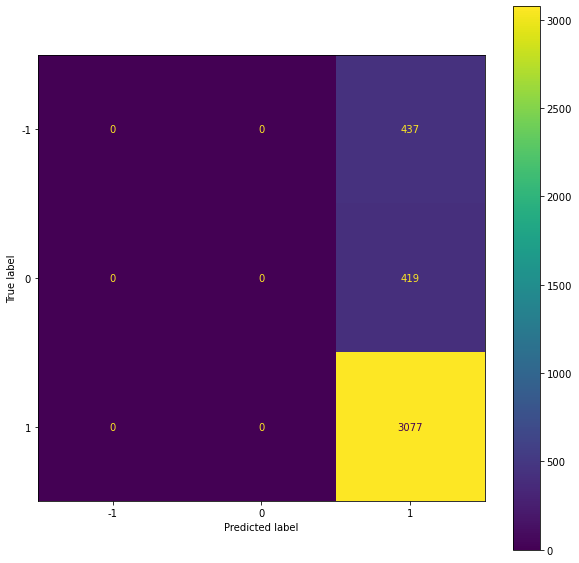

In [30]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from matplotlib.pyplot import figure

disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=rf.classes_)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax, values_format='')
plt.show()

### Balancing the Classes

**With Undersampling**

In [31]:
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler

under_sampler = RandomUnderSampler(random_state=3)
X_res, y_res = under_sampler.fit_resample(X_train, y_train)
print(f"Training target statistics: {Counter(y_res)}")
print(f"Testing target statistics: {Counter(y_test)}")

Training target statistics: Counter({-1: 1614, 0: 1614, 1: 1614})
Testing target statistics: Counter({1: 3077, -1: 437, 0: 419})


In [32]:
rf = RandomForestClassifier(n_estimators = 100, random_state = 42, max_depth=5)
rf.fit(X_res, y_res)

y_pred_enc = rf.predict_proba(X_test)
y_pred = [one_h.categories_[0][i] for i in np.argmax(y_pred_enc, axis= 1)]

average_precision = precision_score(y_test, y_pred, average='micro')
print(average_precision)


0.669717772692601


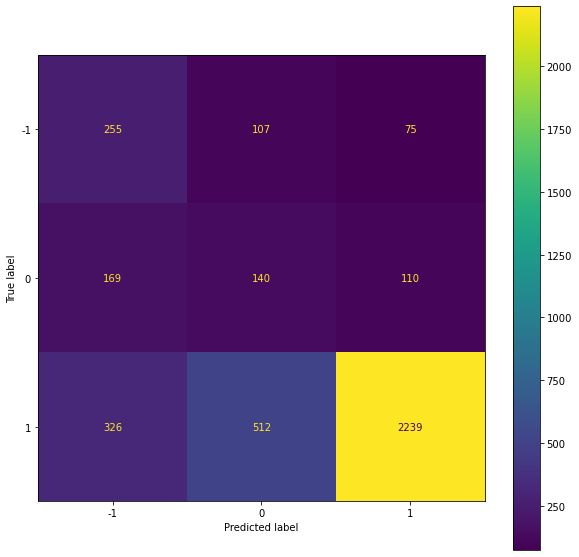

In [33]:
from matplotlib.pyplot import figure

# figure(figsize=(20, 20))
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=rf.classes_)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax, values_format='')
plt.show()

**Model with only Word2Vec features**

In [34]:
label = "is_bad_review"
# ignore_cols = [label, "Review Text", "clean_review"]
features = ['doc2vec_vector_0', 'doc2vec_vector_1', 'doc2vec_vector_2', 'doc2vec_vector_3', 'doc2vec_vector_4']

# split the data into train and test
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(reviews_df[features], reviews_df[label], test_size = 0.20, random_state = 42)
X_res, y_res = under_sampler.fit_resample(X_train, y_train)

rf = RandomForestClassifier(n_estimators = 100, random_state = 42, max_depth=5)
rf.fit(X_res, y_res)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [35]:
y_pred_enc = rf.predict_proba(X_test)
y_pred = [one_h.categories_[0][i] for i in np.argmax(y_pred_enc, axis= 1)]

average_precision = precision_score(y_test, y_pred, average='micro')
print(average_precision)

0.5990338164251208


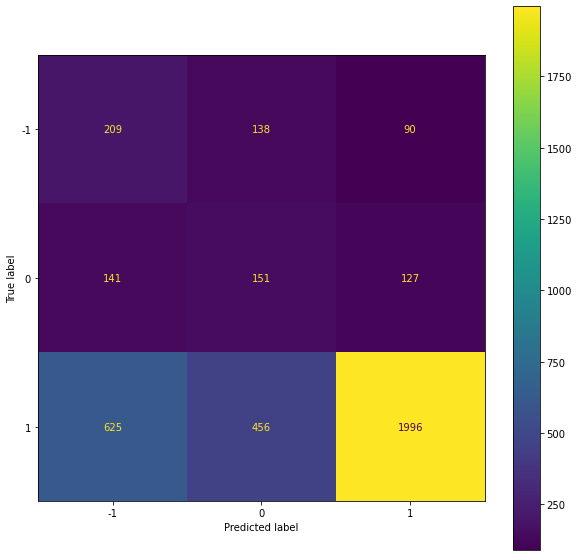

In [36]:
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=rf.classes_)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax, values_format='')
plt.show()

**Model without Word2vec features**

In [37]:
label = "is_bad_review"
ignore_cols = [label,'Review Text', 'clean_review', 'doc2vec_vector_0', 'doc2vec_vector_1', 'doc2vec_vector_2', 'doc2vec_vector_3', 'doc2vec_vector_4']
features = [c for c in reviews_df.columns if c not in ignore_cols]

# split the data into train and test
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(reviews_df[features], reviews_df[label], test_size = 0.20, random_state = 42)
X_res, y_res = under_sampler.fit_resample(X_train, y_train)

rf = RandomForestClassifier(n_estimators = 100, random_state = 42, max_depth=5)
rf.fit(X_res, y_res)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [38]:
y_pred_enc = rf.predict_proba(X_test)
y_pred = [one_h.categories_[0][i] for i in np.argmax(y_pred_enc, axis= 1)]

average_precision = precision_score(y_test, y_pred, average='micro')
print(average_precision)

0.6514111365369947


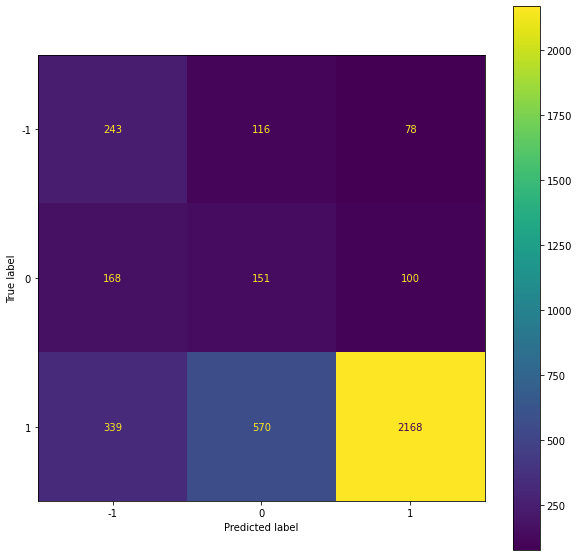

In [39]:
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=rf.classes_)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax, values_format='')
plt.show()

## Implementing various models

In [40]:
reviews_df.head()

,index,Review Text,is_bad_review,clean_review,num_char,num_words,doc2vec_vector_0,doc2vec_vector_1,doc2vec_vector_2,doc2vec_vector_3,...,word_true,word_try,word_usually,word_waist,word_want,word_way,word_wear,word_well,word_work,word_would
0,2,I had such high hopes for this dress and reall...,0,high hope dress really wanted work initially o...,500,98,0.087740,0.090685,0.269328,-0.387632,...,0.0,0.000000,0.00000,0.0,0.0,0.0,0.000000,0.000000,0.214740,0.000000
1,3,"I love, love, love this jumpsuit. it's fun, fl...",1,love love love jumpsuit fun flirty fabulous ev...,124,22,0.087790,0.063461,0.078039,-0.015430,...,0.0,0.000000,0.00000,0.0,0.0,0.0,0.291193,0.000000,0.000000,0.000000
2,4,This shirt is very flattering to all due to th...,1,shirt flatter due adjustable front tie perfect...,192,36,0.076050,0.006195,0.275669,-0.116098,...,0.0,0.000000,0.00000,0.0,0.0,0.0,0.226053,0.297903,0.000000,0.000000
3,5,"I love tracy reese dresses, but this one is no...",-1,love tracy reese dress one petite foot tall us...,488,98,-0.011343,0.330914,-0.096224,-0.219925,...,0.0,0.000000,0.21328,0.0,0.0,0.0,0.132613,0.000000,0.195028,0.162971
4,6,I aded this in my basket at hte last mintue to...,1,aded basket hte last mintue see would look lik...,496,101,0.611502,0.760502,-0.048598,-0.893866,...,0.0,0.461209,0.00000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.194829


In [41]:
# reviews_df[[c for c in reviews_df if c not in ['is_bad_review']] 
#        + ['is_bad_review']]

In [42]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [43]:
def train(XTrain,XTest,yTrain,yTest,method):
    model = method.fit(XTrain.to_numpy(), yTrain)
    predicted_label_train=model.predict(XTrain.to_numpy())
    predicted_label_test=model.predict(XTest.to_numpy())
    groundtruth_label_train=yTrain.to_numpy()
    groundtruth_label_test=yTest.to_numpy()

    accuracy_train=accuracy_score(predicted_label_train,groundtruth_label_train)
    accuracy_test=accuracy_score(predicted_label_test,groundtruth_label_test)
    macro_precision_train=precision_score(predicted_label_train,groundtruth_label_train,average='macro')
    macro_precision_test=precision_score(predicted_label_test,groundtruth_label_test,average='macro')
    micro_precision_train=precision_score(predicted_label_train,groundtruth_label_train,average='micro')
    micro_precision_test=precision_score(predicted_label_test,groundtruth_label_test,average='micro')
    
    macro_recall_train=recall_score(predicted_label_train,groundtruth_label_train,average='macro')
    macro_recall_test=recall_score(predicted_label_test,groundtruth_label_test,average='macro')
    micro_recall_train=recall_score(predicted_label_train,groundtruth_label_train,average='micro')
    micro_recall_test=recall_score(predicted_label_test,groundtruth_label_test,average='micro')

    macro_f1_train=f1_score(predicted_label_train,groundtruth_label_train,average='macro')
    macro_f1_test=f1_score(predicted_label_test,groundtruth_label_test,average='macro')
    micro_f1_train=f1_score(predicted_label_train,groundtruth_label_train,average='micro')
    micro_f1_test=f1_score(predicted_label_test,groundtruth_label_test,average='micro')

    return accuracy_train,accuracy_test, macro_precision_train, macro_precision_test,micro_precision_train,micro_precision_test,macro_recall_train,macro_recall_test,micro_recall_train,micro_recall_test,macro_f1_train,macro_f1_test,micro_f1_train,micro_f1_test

In [44]:
#Implementing cross validation
def Cross_Val(x,y,method):
  accuracy_train_list = []
  accuracy_test_list = []
  macro_precision_train_list = []
  macro_precision_test_list = []
  micro_precision_train_list = []
  micro_precision_test_list = []
  macro_recall_train_list = []
  macro_recall_test_list = []
  micro_recall_train_list = []
  micro_recall_test_list = []
  macro_f1_train_list = []
  macro_f1_test_list = []
  micro_f1_train_list = []
  micro_f1_test_list = []

  k = 10
  kf = KFold(n_splits=k, random_state=None)
  for train_index , test_index in kf.split(x):
    XTrain , XTest = x.iloc[train_index,:],x.iloc[test_index,:]
    yTrain , yTest = y.iloc[train_index],y.iloc[test_index]
    accuracy_train,accuracy_test, macro_precision_train, macro_precision_test,micro_precision_train,micro_precision_test,macro_recall_train,macro_recall_test,micro_recall_train,micro_recall_test,macro_f1_train,macro_f1_test,micro_f1_train,micro_f1_test = train(XTrain,XTest,yTrain,yTest,method)
    accuracy_train_list.append(accuracy_train)
    accuracy_test_list.append(accuracy_test)
    macro_precision_train_list.append(macro_precision_train)
    macro_precision_test_list.append(macro_precision_test)
    micro_precision_train_list.append(micro_precision_train)
    micro_precision_test_list.append(micro_precision_test)
    macro_recall_train_list.append(macro_recall_train)
    macro_recall_test_list.append(macro_recall_test)
    micro_recall_train_list.append(micro_recall_train)
    micro_recall_test_list.append(micro_recall_test)
    macro_f1_train_list.append(macro_f1_train)
    macro_f1_test_list.append(macro_f1_test)
    micro_f1_train_list.append(micro_f1_train)
    micro_f1_test_list.append(micro_f1_test)
    
  accuracy_train = sum(accuracy_train_list)/len(accuracy_train_list)
  accuracy_test = sum(accuracy_test_list)/len(accuracy_test_list)
  macro_precision_train = sum(macro_precision_train_list)/len(macro_precision_train_list)
  macro_precision_test = sum(macro_precision_test_list)/len(macro_precision_test_list)
  micro_precision_train = sum(macro_precision_train_list)/len(macro_precision_train_list)
  micro_precision_test = sum(micro_precision_test_list)/len(micro_precision_test_list)
  macro_recall_train = sum(macro_recall_train_list)/len(macro_recall_train_list)
  macro_recall_test = sum(macro_recall_test_list)/len(macro_recall_test_list)
  micro_recall_train = sum(macro_recall_train_list)/len(macro_recall_train_list)
  micro_recall_test = sum(micro_recall_test_list)/len(micro_recall_test_list)
  macro_f1_train = sum(macro_f1_train_list)/len(macro_f1_train_list)
  macro_f1_test = sum(macro_f1_test_list)/len(macro_f1_test_list)
  micro_f1_train = sum(macro_f1_train_list)/len(macro_f1_train_list)
  micro_f1_test = sum(micro_f1_test_list)/len(micro_f1_test_list)
  
  return accuracy_train,accuracy_test, macro_precision_train, macro_precision_test,micro_precision_train,micro_precision_test,macro_recall_train,macro_recall_test,micro_recall_train,micro_recall_test,macro_f1_train,macro_f1_test,micro_f1_train,micro_f1_test


In [45]:
# y = reviews_df.iloc[:, -1]
# Xraw,X_validate = train_test_split(x, test_size=0.2, shuffle=True,random_state=1)
# yraw,y_validate = train_test_split(y, test_size=0.2, shuffle=True,random_state=1)
# XTrain,XTest = train_test_split(Xraw, test_size=0.5, shuffle=True,random_state=1)
# yTrain,yTest = train_test_split(yraw, test_size=0.5, shuffle=True,random_state=1)


label = "is_bad_review"
ignore_cols = [label,'index', 'Review Text', 'clean_review', 'doc2vec_vector_0', 'doc2vec_vector_1', 'doc2vec_vector_2', 'doc2vec_vector_3', 'doc2vec_vector_4']
features = [c for c in reviews_df.columns if c not in ignore_cols]
# X_train, X_test, y_train, y_test = train_test_split(reviews_df[features], reviews_df[label], test_size = 0.20, random_state = 42)
Xraw, X_validate = train_test_split(reviews_df[features], test_size=0.2, shuffle=True,random_state=1)
yraw,y_validate = train_test_split(reviews_df[label], test_size=0.2, shuffle=True,random_state=1)
X_train, X_test = train_test_split(Xraw, test_size=0.5, shuffle=True,random_state=1)
yTrain,yTest = train_test_split(yraw, test_size=0.5, shuffle=True,random_state=1)
X_res, y_res = under_sampler.fit_resample(Xraw, yraw)

method = [KNeighborsClassifier(n_neighbors=3),DecisionTreeClassifier(),LogisticRegression(max_iter=10000),RandomForestClassifier(n_estimators = 100, random_state = 42, max_depth=5)]
method_list = ['KNeighbors Classifier','Decision Tree Classifier','Logistic Regression','Random Forest Classifier']

results = []
for i in range(len(method_list)):
  accuracy_train,accuracy_test, macro_precision_train, macro_precision_test,micro_precision_train,micro_precision_test,macro_recall_train,macro_recall_test,micro_recall_train,micro_recall_test,macro_f1_train,macro_f1_test,micro_f1_train,micro_f1_test = Cross_Val(X_res,y_res,method[i])
  results.append([method_list[i],accuracy_train,accuracy_test, macro_precision_train, macro_precision_test,micro_precision_train,micro_precision_test,macro_recall_train,macro_recall_test,micro_recall_train,micro_recall_test,macro_f1_train,macro_f1_test,micro_f1_train,micro_f1_test])

C:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set

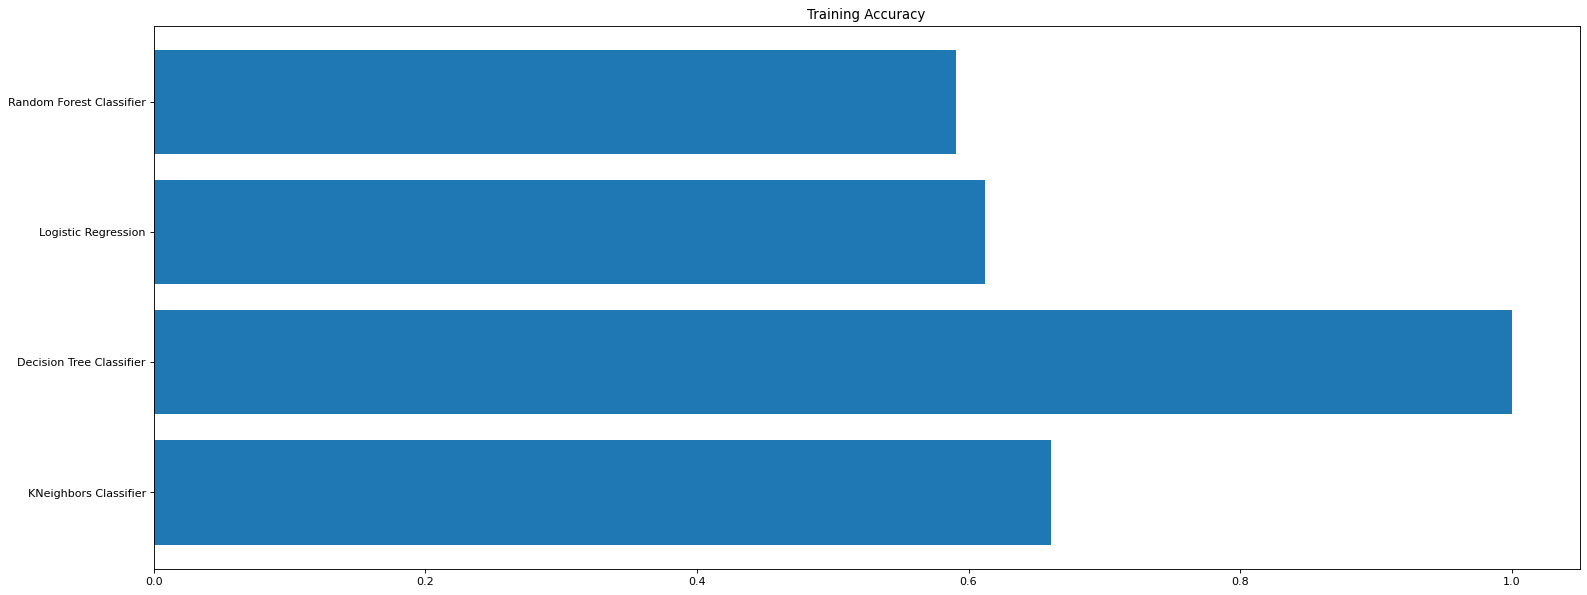

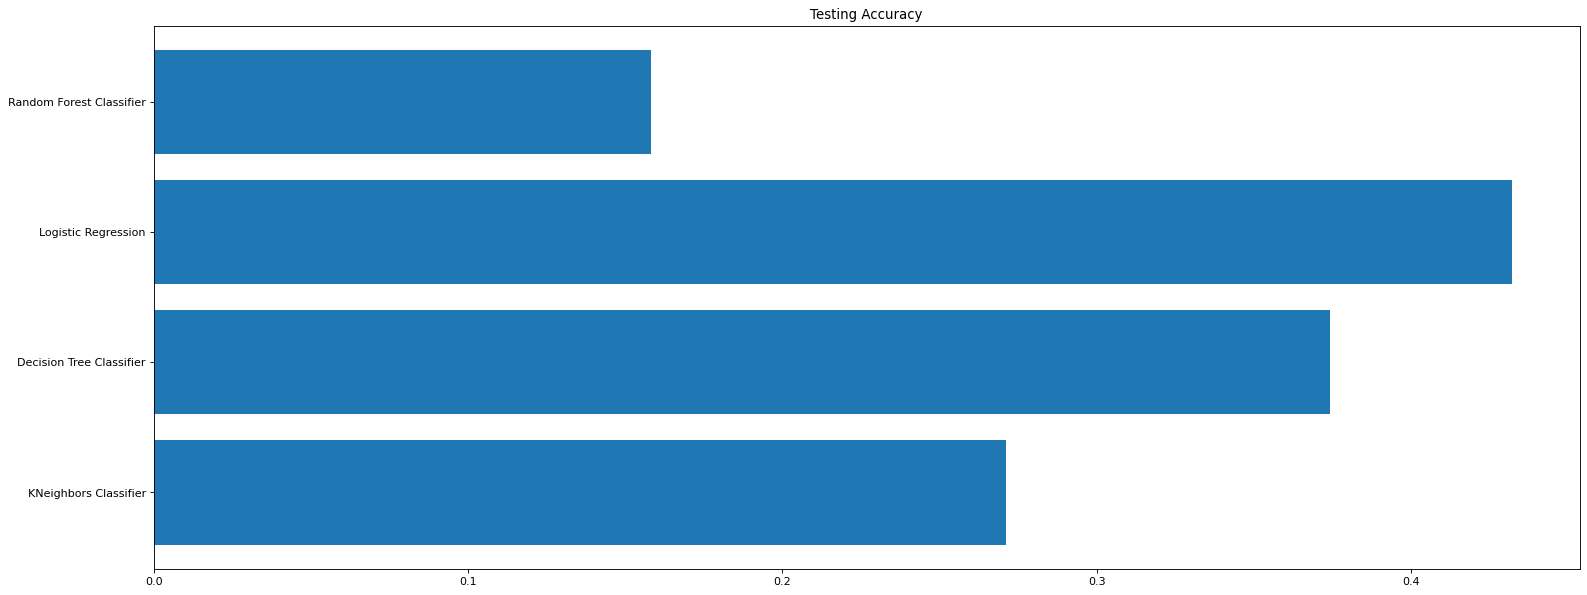

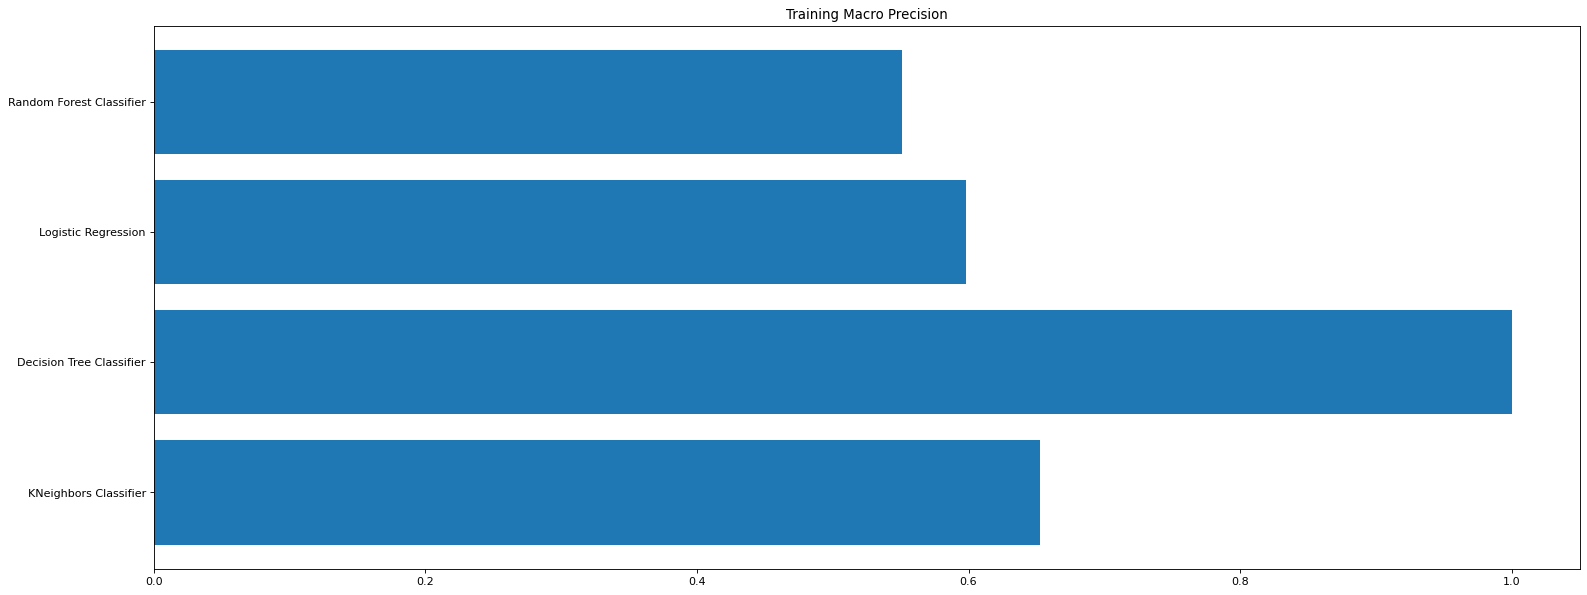

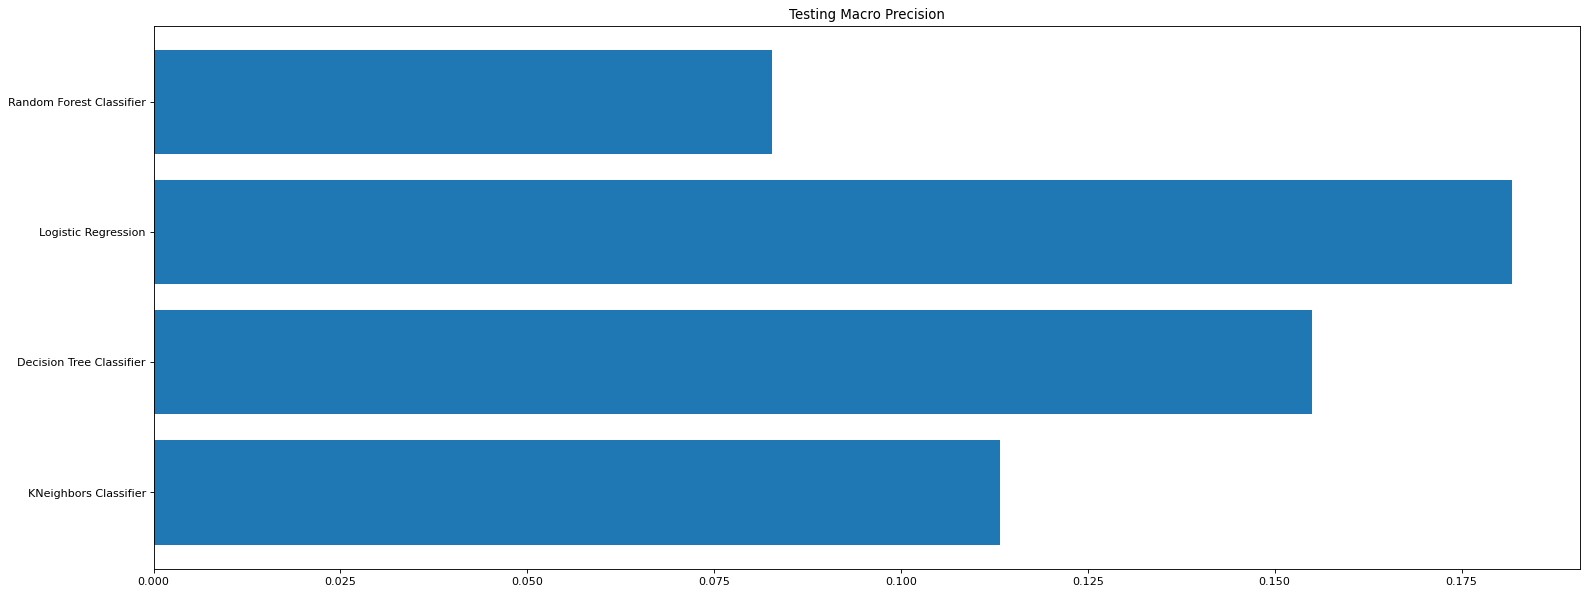

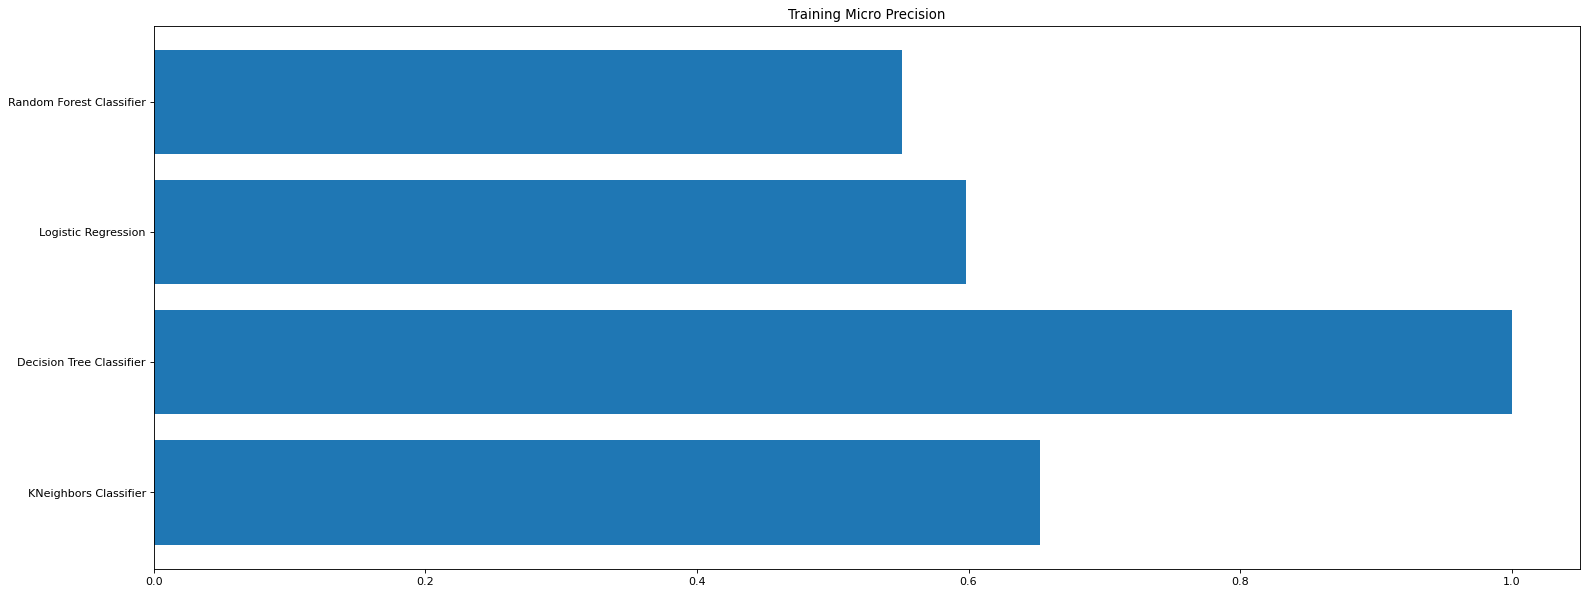

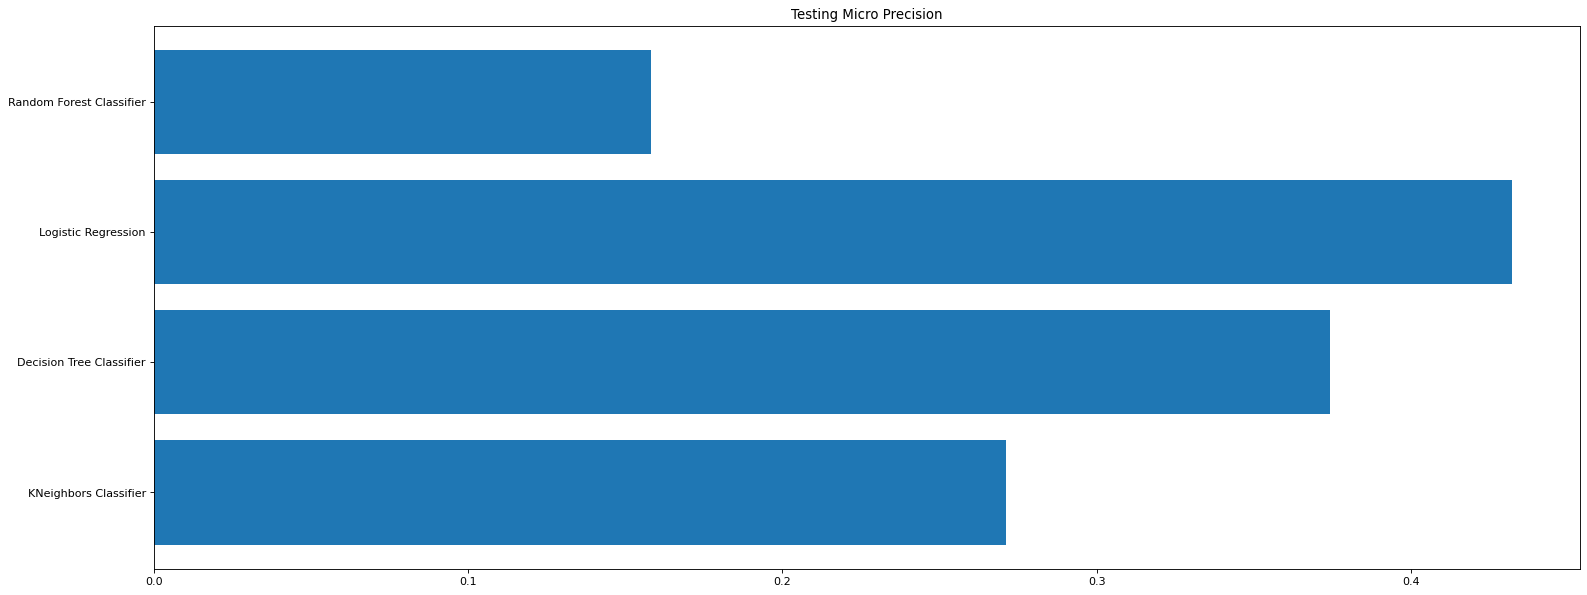

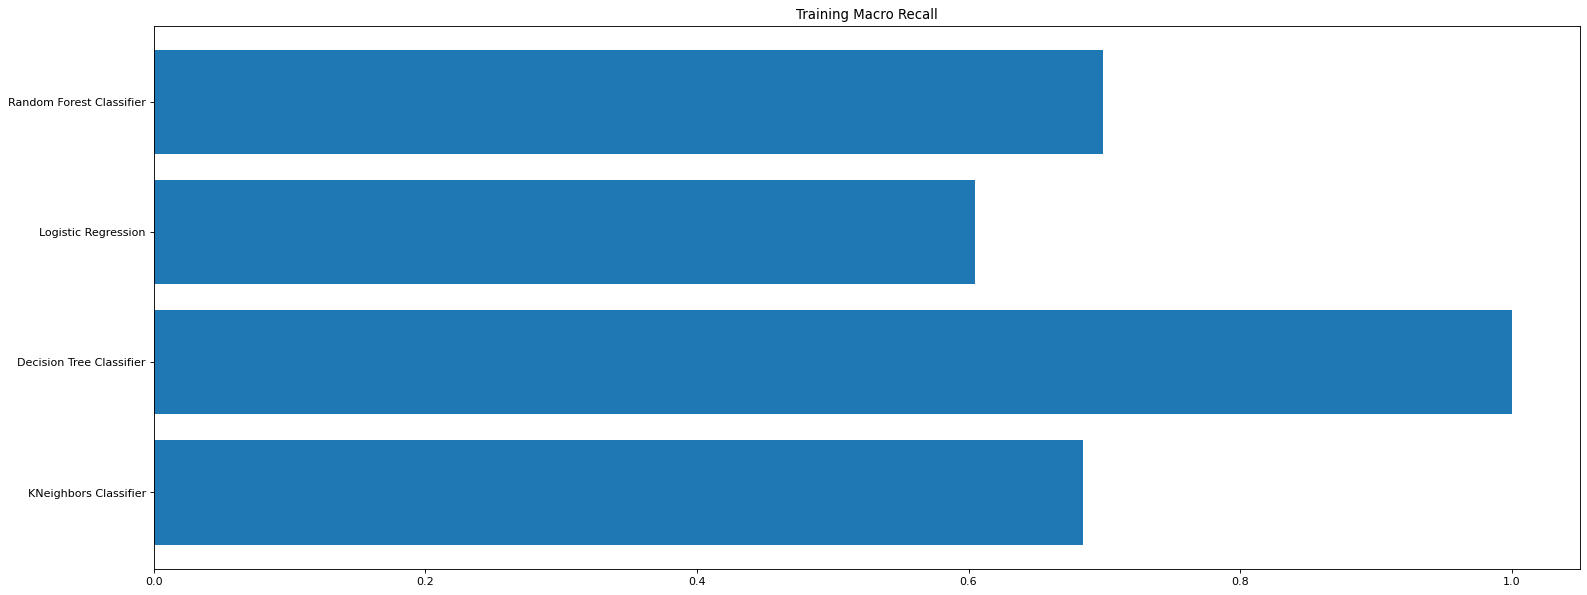

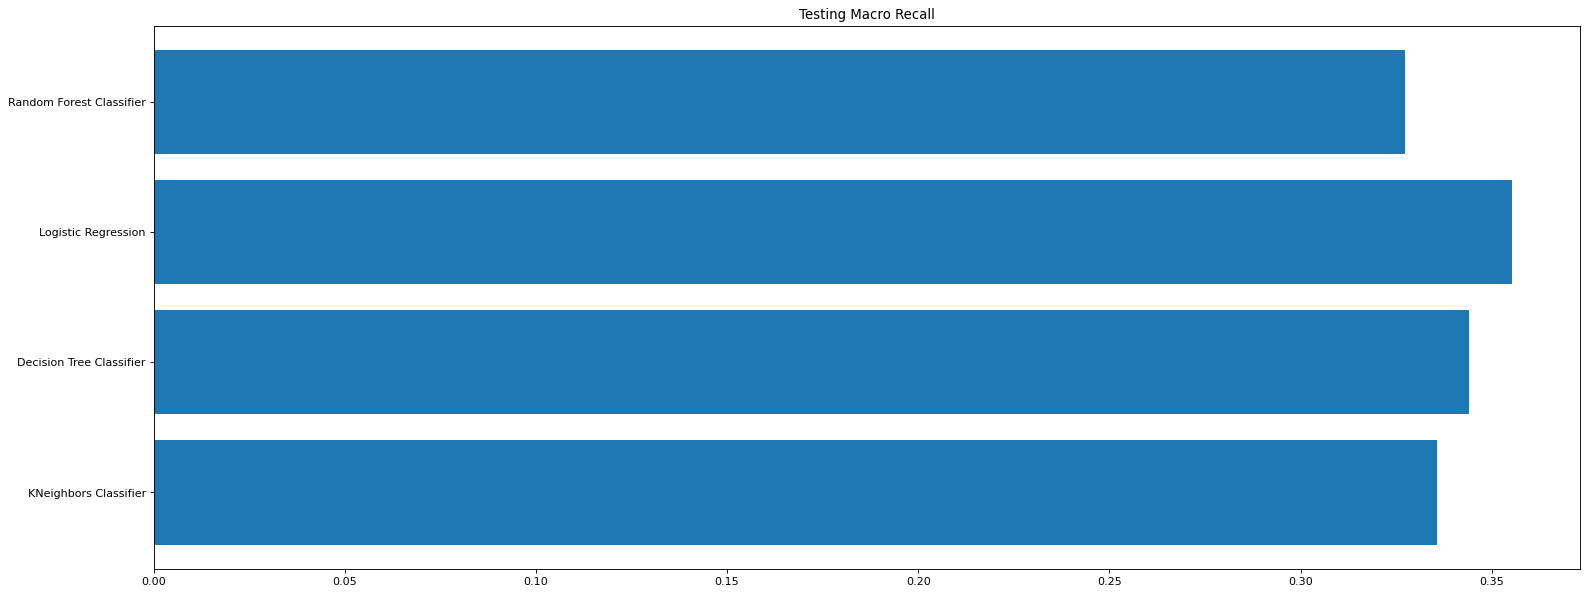

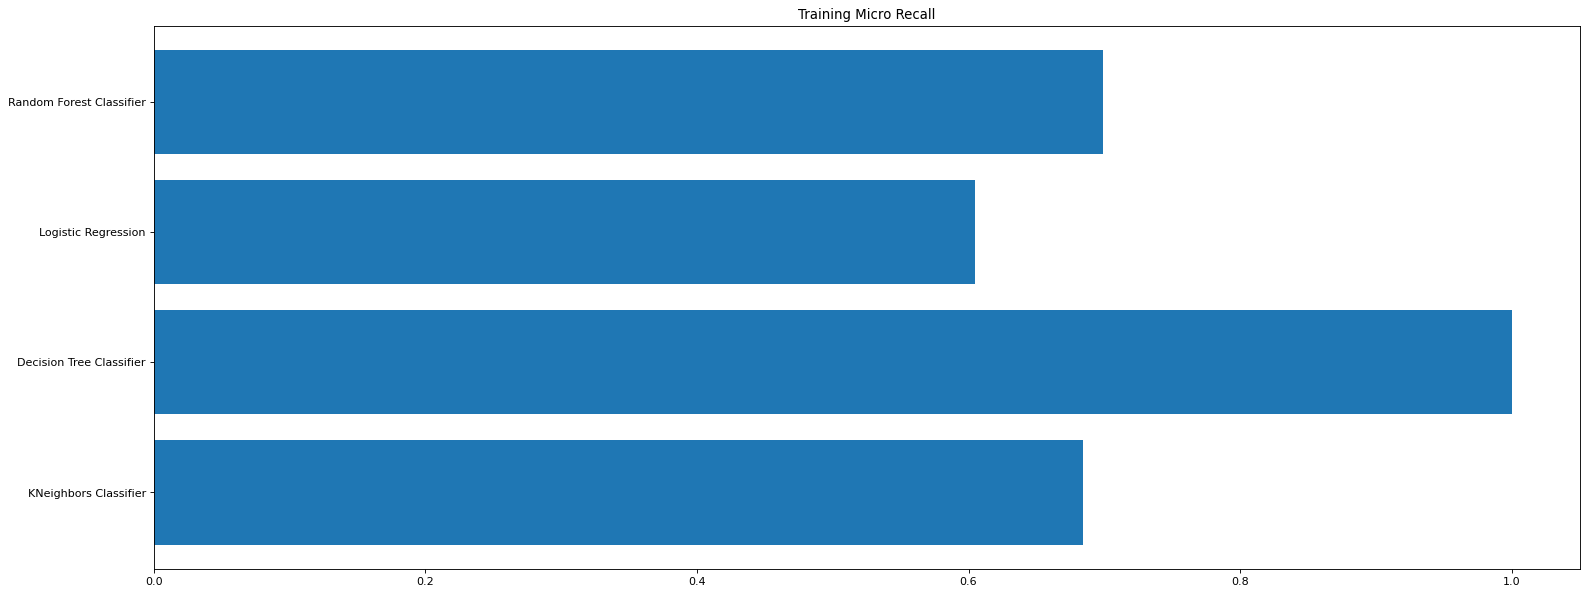

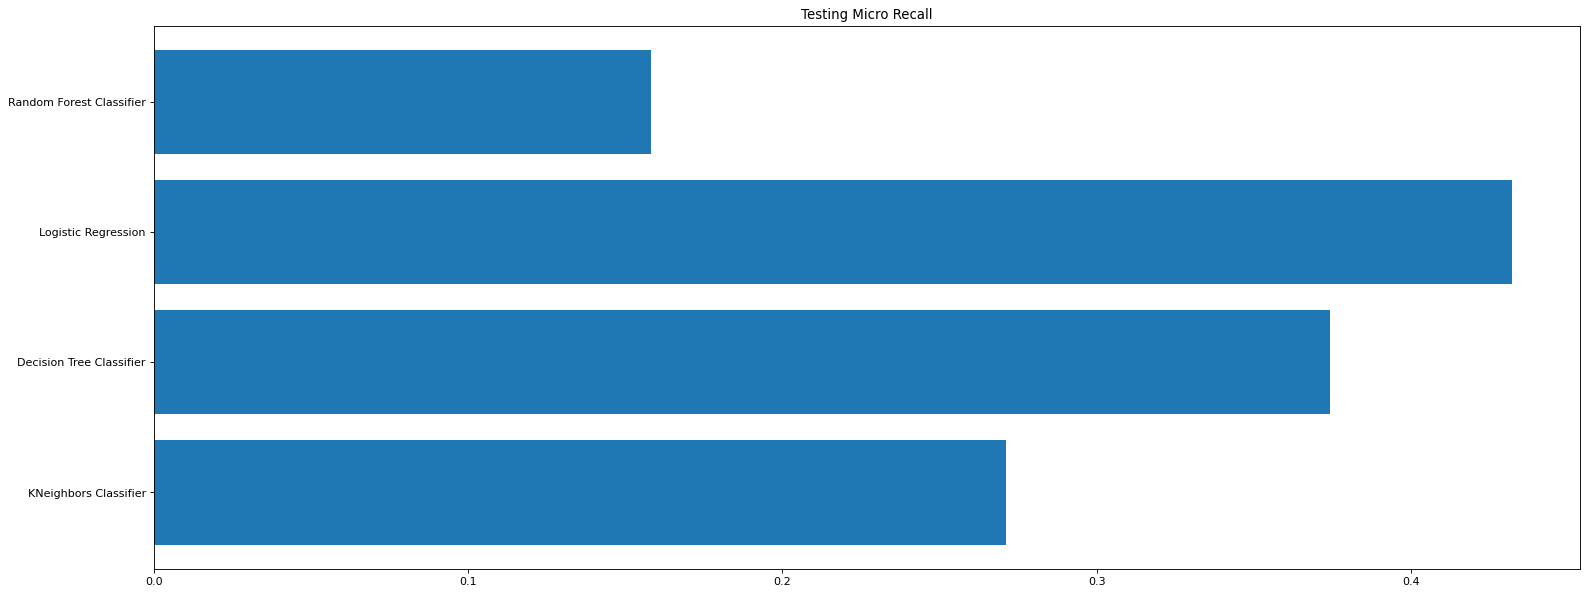

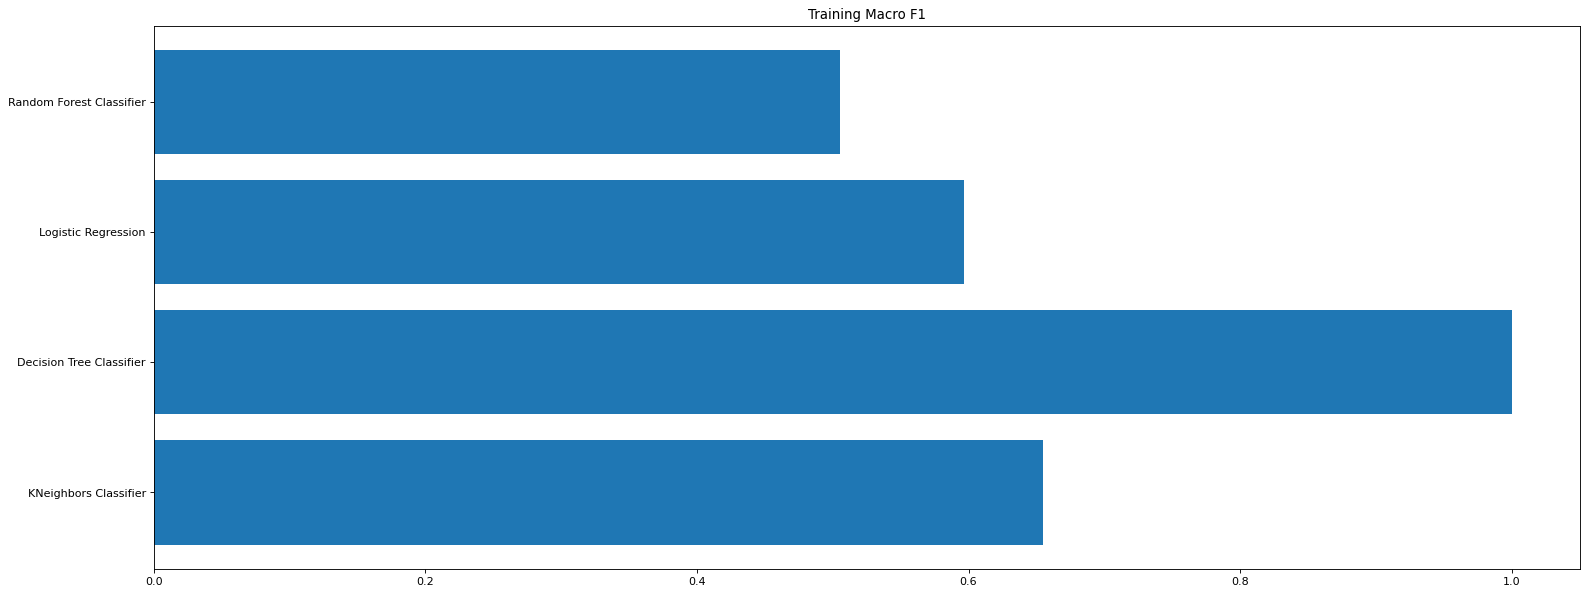

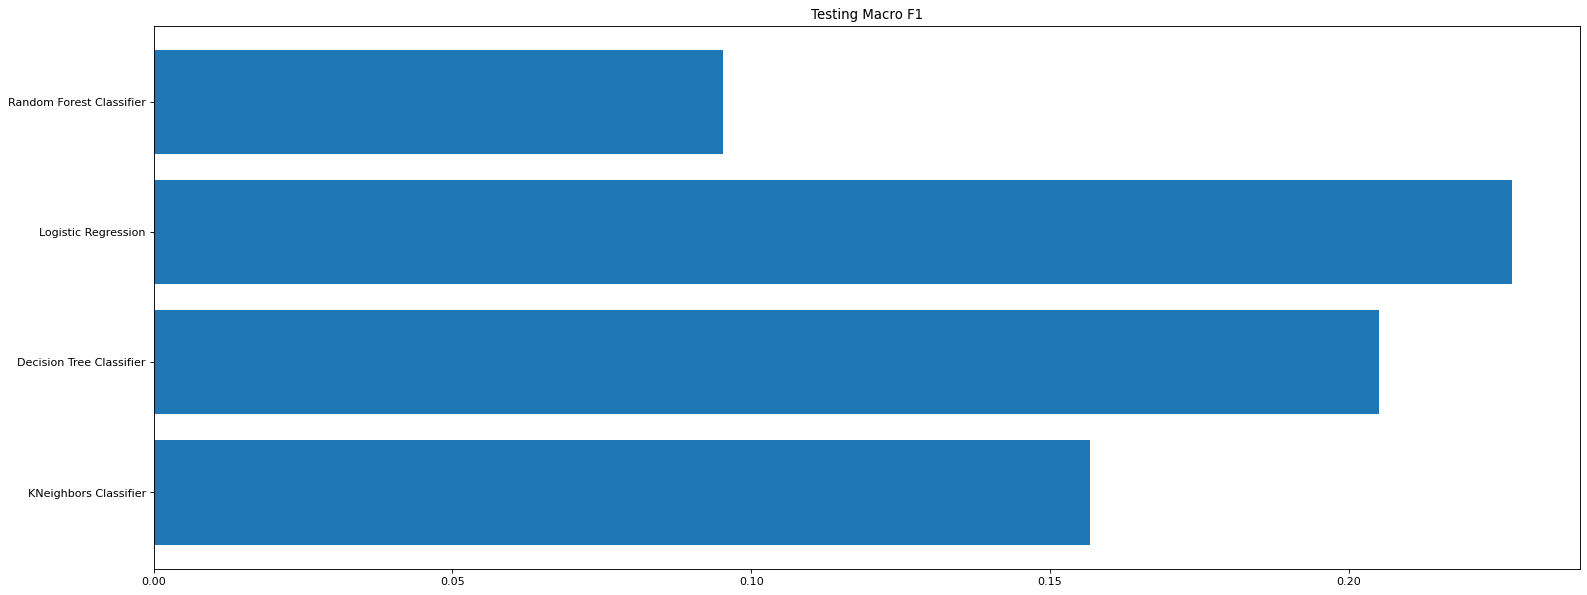

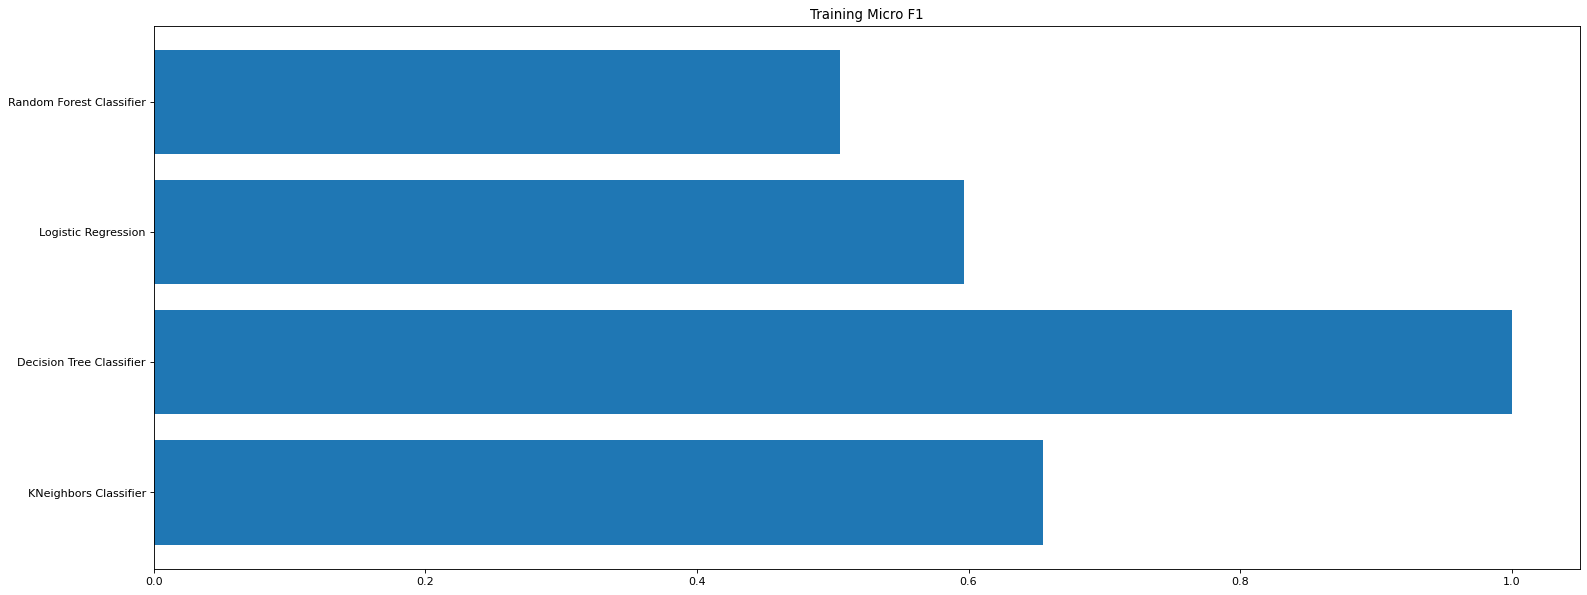

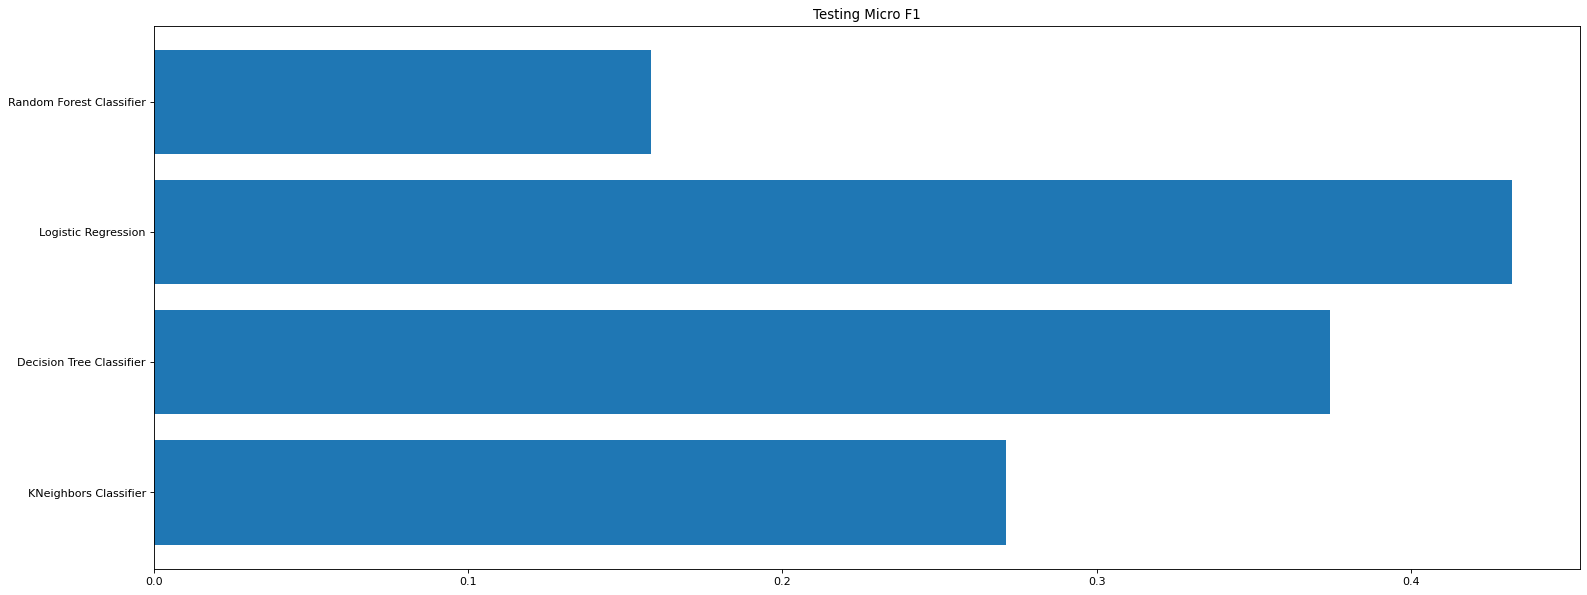

In [46]:
df = pd.DataFrame(results,columns=["Model", "Training Accuracy", "Testing Accuracy", "Training Macro Precision", "Testing Macro Precision","Training Micro Precision", "Testing Micro Precision","Training Macro Recall", "Testing Macro Recall","Training Micro Recall", "Testing Micro Recall","Training Macro F1", "Testing Macro F1","Training Micro F1", "Testing Micro F1"])
headers=["Training Accuracy", "Testing Accuracy", "Training Macro Precision", "Testing Macro Precision","Training Micro Precision", "Testing Micro Precision","Training Macro Recall", "Testing Macro Recall","Training Micro Recall", "Testing Micro Recall","Training Macro F1", "Testing Macro F1","Training Micro F1", "Testing Micro F1"]
for i in headers:
  plt.figure(figsize=(23, 9), dpi=80)
  plt.barh(df['Model'],df[i])
  plt.title(i)

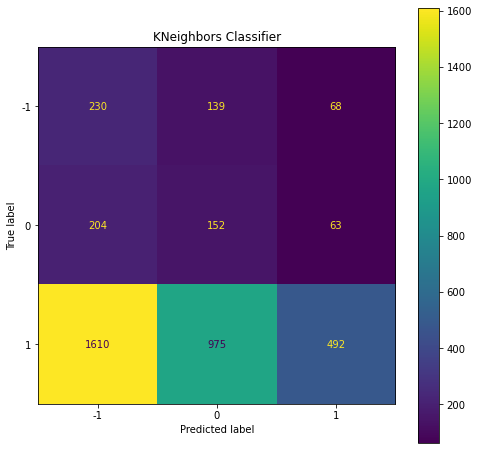

In [47]:
# KNN
y_pred_enc = method[0].predict_proba(X_validate)
y_pred = [one_h.categories_[0][i] for i in np.argmax(y_pred_enc, axis= 1)]

disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=rf.classes_)
fig, ax = plt.subplots(figsize=(8,8))
disp.plot(ax=ax, values_format='')
plt.title(method_list[0])
plt.show()

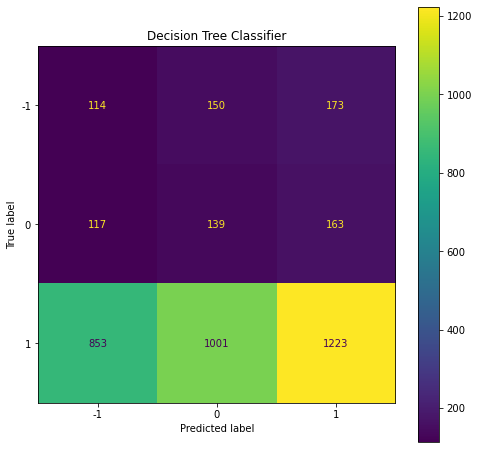

In [48]:
# Decision Tree
y_pred_enc = method[1].predict_proba(X_validate)
y_pred = [one_h.categories_[0][i] for i in np.argmax(y_pred_enc, axis= 1)]

disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=rf.classes_)
fig, ax = plt.subplots(figsize=(8,8))
disp.plot(ax=ax, values_format='')
plt.title(method_list[1])
plt.show()  

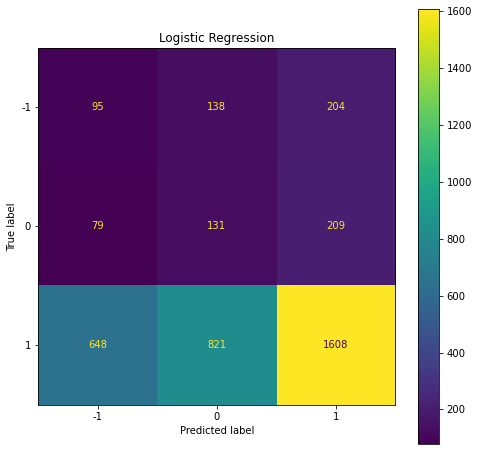

In [49]:
# Logistic Regression

y_pred_enc = method[2].predict_proba(X_validate)
y_pred = [one_h.categories_[0][i] for i in np.argmax(y_pred_enc, axis= 1)]

disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=rf.classes_)
fig, ax = plt.subplots(figsize=(8,8))
disp.plot(ax=ax, values_format='')
plt.title(method_list[2])
plt.show()

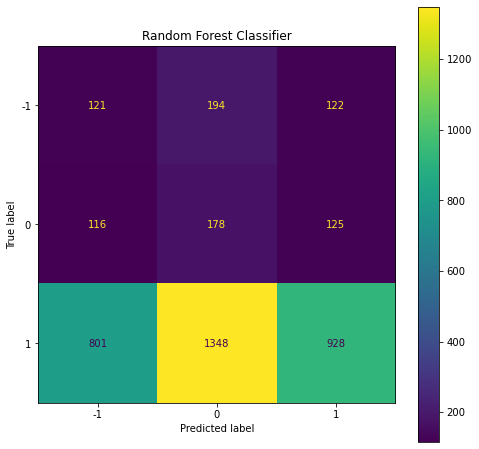

In [50]:
# Random Forest

y_pred_enc = method[3].predict_proba(X_validate)
y_pred = [one_h.categories_[0][i] for i in np.argmax(y_pred_enc, axis= 1)]

disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=rf.classes_)
fig, ax = plt.subplots(figsize=(8,8))
disp.plot(ax=ax, values_format='')
plt.title(method_list[3])
plt.show()